In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/online_retail_II.csv')

# DATA EXPLORATION

In [3]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [5]:
data.describe().round(2)

,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


In [6]:
data.shape

(1067371, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [8]:
data['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

#DATA WRANGLING

In [9]:
data.isna().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [10]:
data[data['Description'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


* drop NAN_values in Customer_id bec:every client have only unique num
* drop NAN_values in Description bec:not mean important for me in customer segmantation

In [11]:
data.dropna(subset=['Customer ID','Description'], inplace=True)

In [12]:
data.duplicated().sum()

np.int64(26479)

In [13]:
data[data.duplicated(keep=False)].sort_values(by=list(data.columns)).head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
379,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
391,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
365,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
394,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
362,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
368,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom


In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data['Invoice'] = data['Invoice'].astype(str)
data['StockCode'] = data['StockCode'].astype(str)
data['Description'] = data['Description'].astype(str)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Customer ID'] = data['Customer ID'].astype('Int64')
data['Country'] = data['Country'].astype(str)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  Int64         
 7   Country      797885 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 55.5+ MB


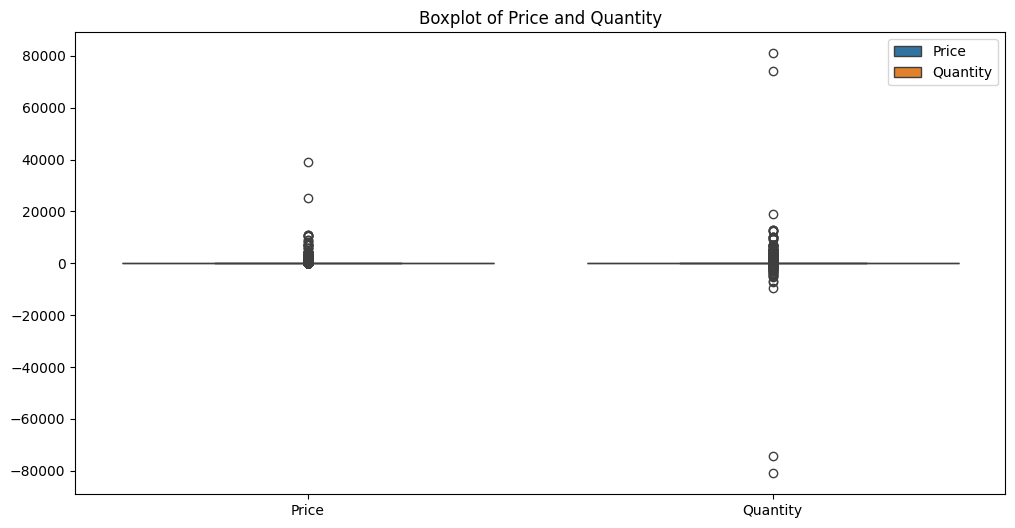

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data[['Price','Quantity']])
plt.legend(['Price','Quantity'])
plt.title('Boxplot of Price and Quantity')
plt.show()

In [18]:
print(f" quantity less than 0={data[data['Quantity']<0]['Quantity'].sum()}")
print(f"quantity =0 {data[data['Quantity']==0]['Quantity'].sum()}")
print(f"price<0={data[data['Price']<0]['Price'].sum()}")

 quantity less than 0=-472976
quantity =0 0
price<0=0.0


In [19]:
data[['Price','Quantity']].describe().round(2)

,Price,Quantity
count,797885.00,797885.00
mean,3.70,12.60
std,71.39,191.67
min,0.00,-80995.00
25%,1.25,2.00
50%,1.95,5.00
75%,3.75,12.00
max,38970.00,80995.00


In [20]:
data = data[data['Quantity'] > 0]

* since 75% of price and quantity is very differ from the max then i will assume that over 75% is outlier using iQR

In [21]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"[{column}] IQR Filter Applied: Keeping values between {lower_bound:.2f} and {upper_bound:.2f}")
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
data = remove_outliers_iqr(data, 'Quantity')
data = remove_outliers_iqr(data, 'Price')

[Quantity] IQR Filter Applied: Keeping values between -13.00 and 27.00
[Price] IQR Filter Applied: Keeping values between -2.50 and 7.50


In [22]:
print((data['Quantity'] <= 0).sum())
print((data['Price'] <= 0).sum())

0
59


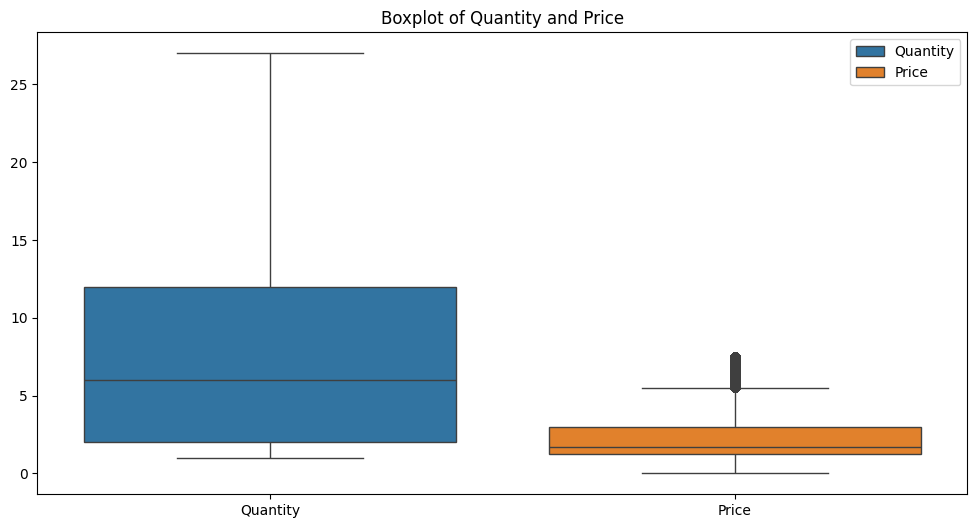

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data[['Quantity','Price']])
plt.legend(['Quantity','Price'])
plt.title('Boxplot of Quantity and Price')
plt.show()

#EDA

In [24]:
data.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom


Text(0.5, 1.0, 'Correlation Heatmap')

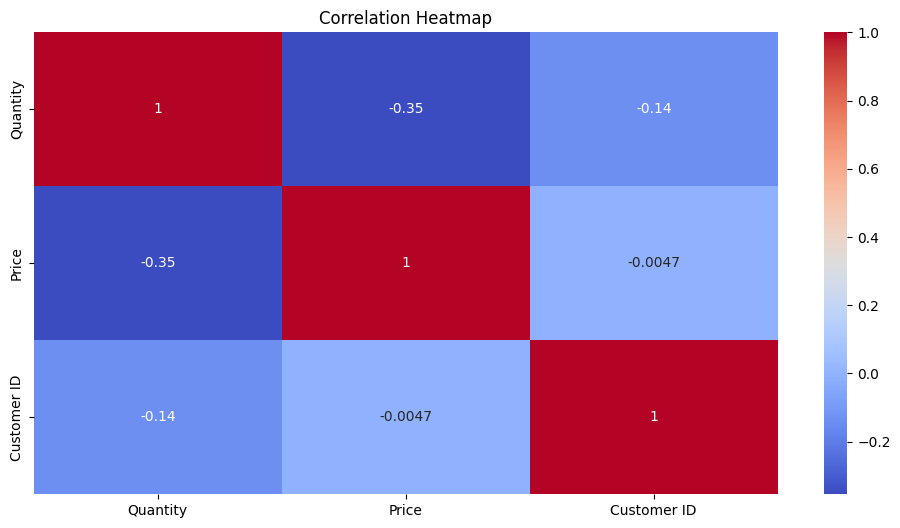

In [25]:
plt.figure(figsize=(12,6))
colum_num=data.select_dtypes(include=['int64','float64']).columns
sns.heatmap(data[colum_num].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

/tmp/ipython-input-26-3703148202.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='Country',palette='mako',order=top_10_countries.index)


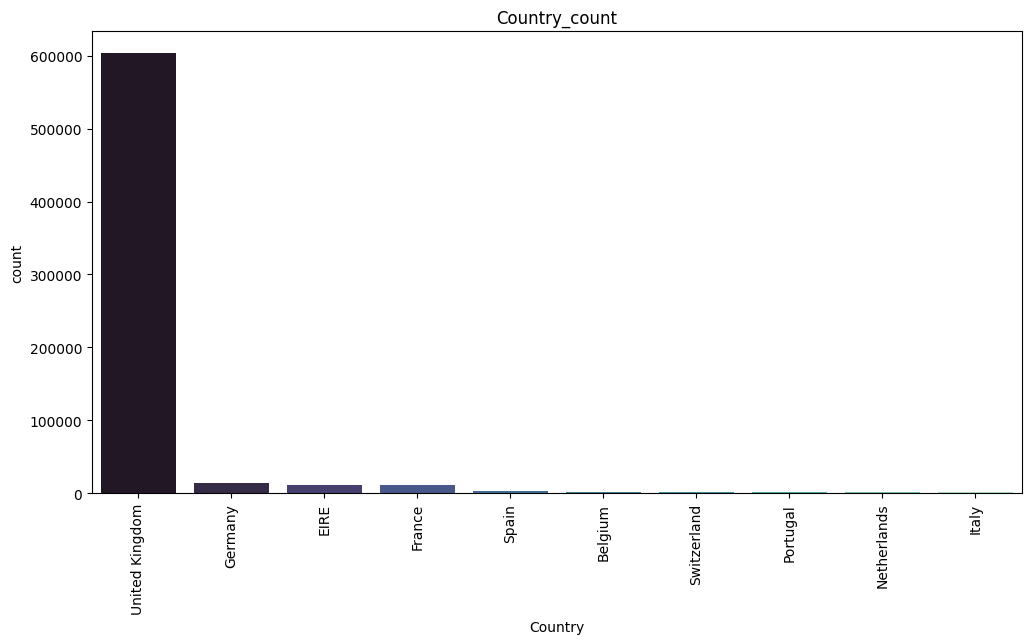

In [26]:
top_10_countries=data['Country'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='Country',palette='mako',order=top_10_countries.index)
plt.xticks(rotation=90)
plt.title('Country_count')
plt.show()

/tmp/ipython-input-27-3306715098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='Customer ID',palette='mako',order=top_10_customer.index)


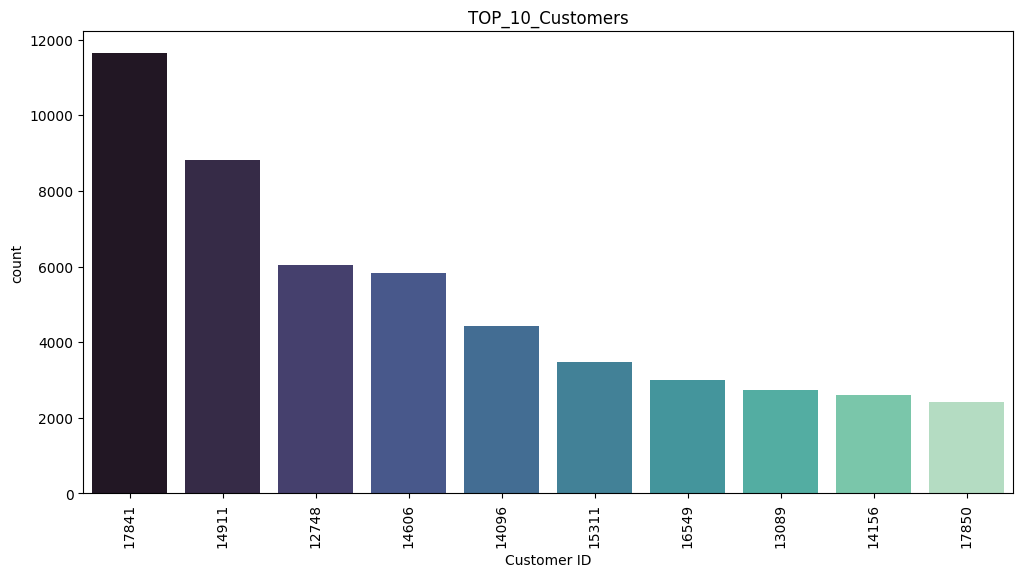

In [27]:
top_10_customer=data['Customer ID'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='Customer ID',palette='mako',order=top_10_customer.index)
plt.xticks(rotation=90)
plt.title('TOP_10_Customers')
plt.show()

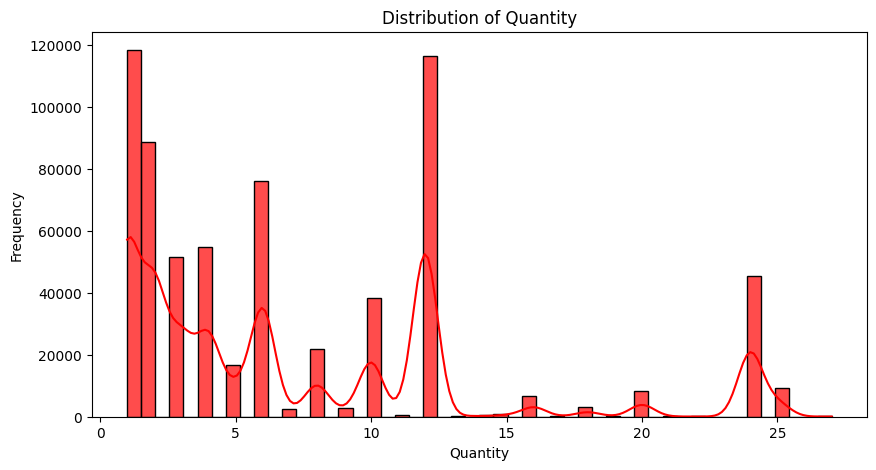

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Quantity'], bins=50, kde=True, color='red', alpha=0.7)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

Text(0, 0.5, 'Frequency')

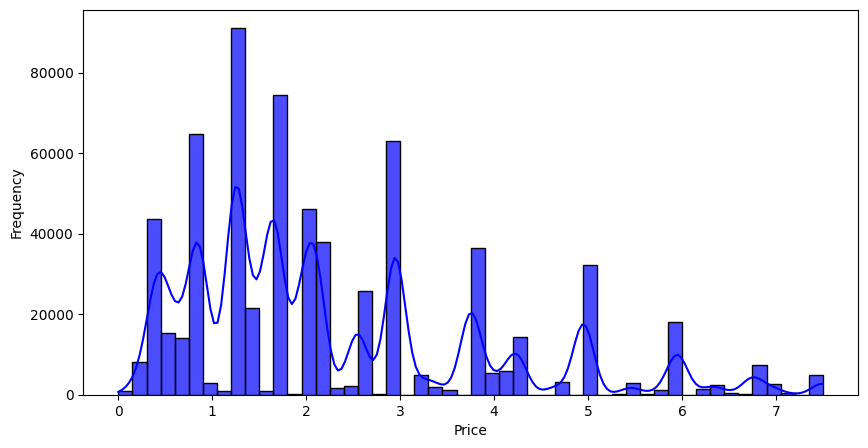

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Price'], bins=50, kde=True, color='blue', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')

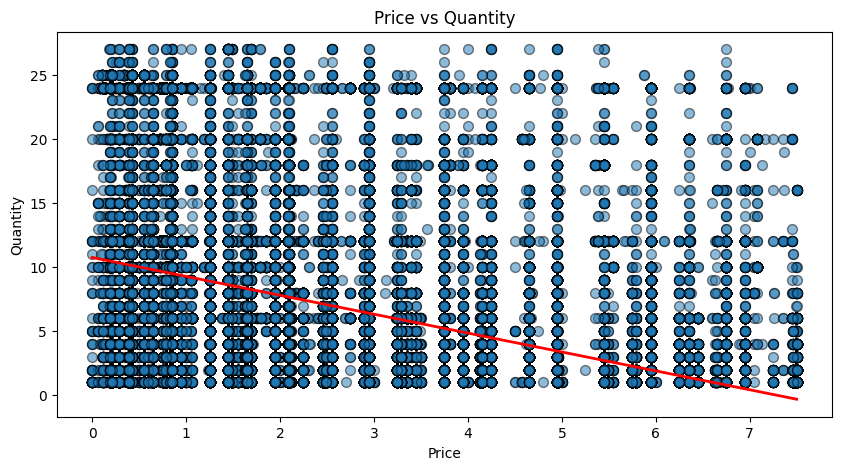

In [30]:
plt.figure(figsize=(10,5))
sns.regplot(data=data,x='Price',y='Quantity',line_kws={'color':'red','linewidth':2},ci=None,scatter_kws={'alpha':0.5, 's':50, 'marker':'o', 'edgecolor':'black'})
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price vs Quantity')
plt.show()

<Axes: xlabel='Description'>

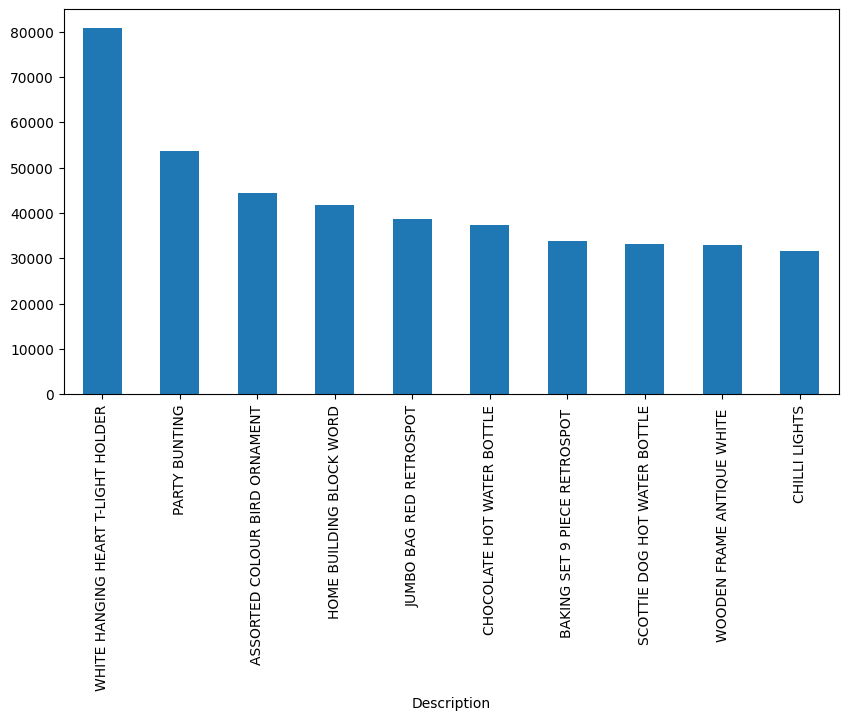

In [31]:
plt.figure(figsize=(10,5))
revenue_per_product = (data['Quantity'] * data['Price']).groupby(data['Description']).sum()
revenue_per_product.sort_values(ascending=False).head(10).plot(kind='bar')

In [32]:
data['date']=pd.to_datetime(data['InvoiceDate']).dt.date
data['month']=pd.to_datetime(data['InvoiceDate']).dt.month
data['day']=pd.to_datetime(data['InvoiceDate']).dt.day
data['hour']=pd.to_datetime(data['InvoiceDate']).dt.hour

/tmp/ipython-input-33-1446604057.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=data, palette='Blues', ax=axes[0, 0])
/tmp/ipython-input-33-1446604057.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=data, palette='Greens', ax=axes[0, 1])
/tmp/ipython-input-33-1446604057.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=data, palette='Purples', ax=axes[1, 0])
/tmp/ipython-input-33-1446604057.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

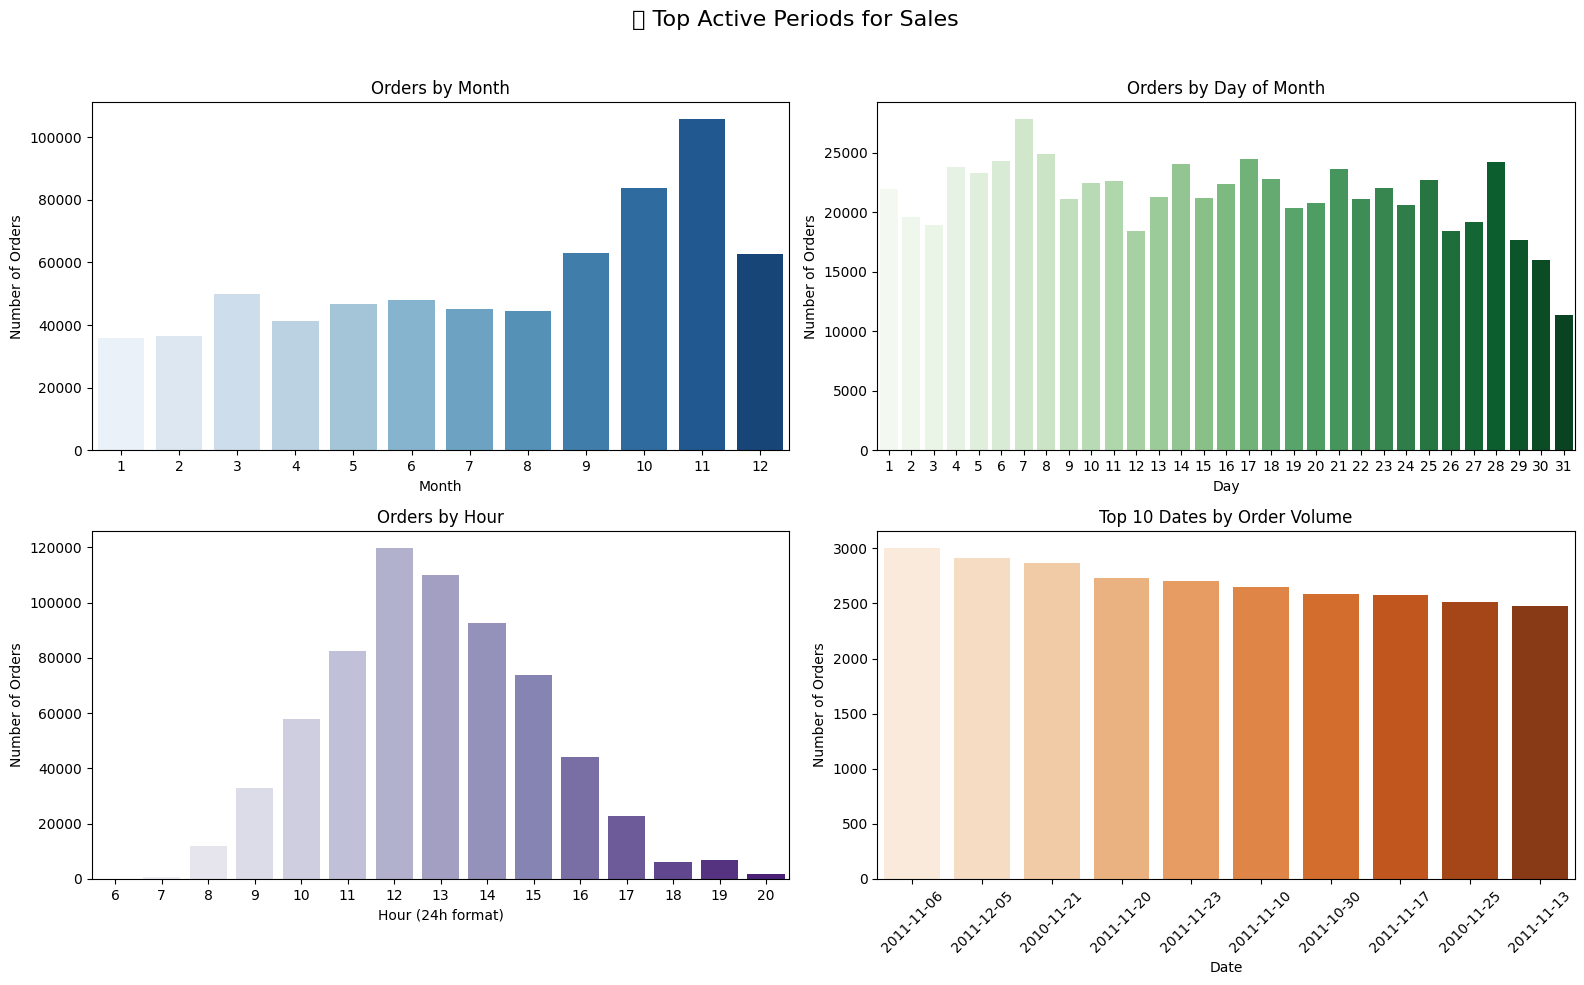

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("🔍 Top Active Periods for Sales", fontsize=16)

sns.countplot(x='month', data=data, palette='Blues', ax=axes[0, 0])
axes[0, 0].set_title("Orders by Month")
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("Number of Orders")

sns.countplot(x='day', data=data, palette='Greens', ax=axes[0, 1])
axes[0, 1].set_title("Orders by Day of Month")
axes[0, 1].set_xlabel("Day")
axes[0, 1].set_ylabel("Number of Orders")

sns.countplot(x='hour', data=data, palette='Purples', ax=axes[1, 0])
axes[1, 0].set_title("Orders by Hour")
axes[1, 0].set_xlabel("Hour (24h format)")
axes[1, 0].set_ylabel("Number of Orders")
top_dates = data['date'].value_counts().head(10)

sns.barplot(x=top_dates.index.astype(str), y=top_dates.values, palette='Oranges', ax=axes[1, 1])
axes[1, 1].set_title("Top 10 Dates by Order Volume")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Number of Orders")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#feature ENG

*for every customer calculate(total of orders,total of products ,total of quantity,total of revunue) to make clustering based on customer data

In [34]:
data['total_revenue']=data['Quantity']*data['Price']
customer_insights = pd.pivot_table(data=data,
                                             index='Customer ID',
                                             values=['Quantity', 'total_revenue', 'StockCode', 'Invoice'],
                                             aggfunc={'Quantity': 'sum',
                                                        'total_revenue': 'sum',
                                                        'StockCode': 'count',
                                                        'Invoice': 'count'})
customer_insights.columns=['total_quantity','total_revenue','total_products','total_orders']
customer_insights=customer_insights.reset_index()
customer_insights

,Customer ID,total_quantity,total_revenue,total_products,total_orders
0,12346,33,70,33,372.86
1,12347,205,2399,205,3888.01
2,12348,26,513,26,312.36
3,12349,138,1421,138,2635.04
4,12350,16,196,16,294.40
...,...,...,...,...,...
5674,18283,923,1663,923,2511.25
5675,18284,20,215,20,286.88
5676,18285,7,56,7,93.20
5677,18286,59,525,59,1051.57


In [35]:
customer_insights['R_Score'] = pd.qcut(customer_insights['total_orders'].rank(method='first', ascending=False), 5, labels=[5,4,3,2,1])
customer_insights['F_Score'] = pd.qcut(customer_insights['total_quantity'].rank(method='first'), 5, labels=[1,2,3,4,5])
customer_insights['M_Score'] = pd.qcut(customer_insights['total_revenue'].rank(method='first'), 5, labels=[1,2,3,4,5])
display(customer_insights.head())

,Customer ID,total_quantity,total_revenue,total_products,total_orders,R_Score,F_Score,M_Score
0,12346,33,70,33,372.86,2,3,1
1,12347,205,2399,205,3888.01,5,5,5
2,12348,26,513,26,312.36,2,2,4
3,12349,138,1421,138,2635.04,5,4,5
4,12350,16,196,16,294.40,2,2,2


In [36]:
customer_insights['RFM_Score'] = customer_insights['R_Score'].astype(str) + customer_insights['F_Score'].astype(str) + customer_insights['M_Score'].astype(str)
display(customer_insights.head())

,Customer ID,total_quantity,total_revenue,total_products,total_orders,R_Score,F_Score,M_Score,RFM_Score
0,12346,33,70,33,372.86,2,3,1,231
1,12347,205,2399,205,3888.01,5,5,5,555
2,12348,26,513,26,312.36,2,2,4,224
3,12349,138,1421,138,2635.04,5,4,5,545
4,12350,16,196,16,294.40,2,2,2,222


In [37]:
def segment_customer(rfm):
    if rfm == '555':
        return 'VIP'
    elif rfm[0] in ['4', '5'] and rfm[1] in ['4', '5']:
        return 'Loyal'
    elif rfm[0] in ['1', '2'] and rfm[1] in ['1', '2']:
        return 'At Risk'
    elif rfm[2] in ['4', '5']:
        return 'Big Spender'
    else:
        return 'Other'
customer_insights['Segment'] = customer_insights['RFM_Score'].apply(segment_customer)
display(customer_insights.head())

,Customer ID,total_quantity,total_revenue,total_products,total_orders,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,33,70,33,372.86,2,3,1,231,Other
1,12347,205,2399,205,3888.01,5,5,5,555,VIP
2,12348,26,513,26,312.36,2,2,4,224,At Risk
3,12349,138,1421,138,2635.04,5,4,5,545,Loyal
4,12350,16,196,16,294.40,2,2,2,222,At Risk


In [38]:
customer_insights['Segment'].value_counts()

,count
Segment,
At Risk,1860
Other,1493
Loyal,1070
VIP,819
Big Spender,437


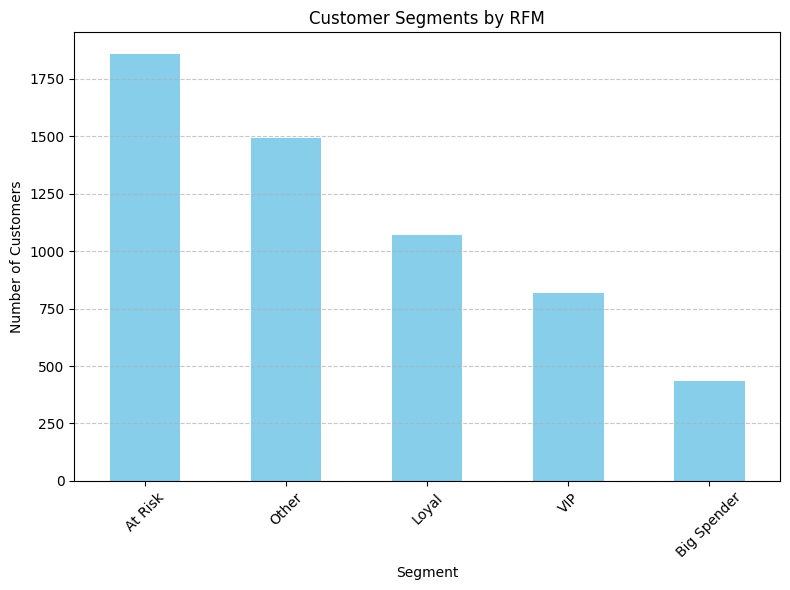

In [39]:
import matplotlib.pyplot as plt
segment_counts = customer_insights['Segment'].value_counts()
plt.figure(figsize=(8,6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Segments by RFM')
plt.ylabel('Number of Customers')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [40]:
customer_kmeans = customer_insights.drop(columns=['RFM_Score', 'Segment'], errors='ignore')
customer_kmeans = customer_kmeans.drop(columns=['Customer ID'], errors='ignore')

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_kmeans)

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
explained_var = pca.explained_variance_ratio_.sum()
print(f"Total variance explained by 2 components: {explained_var:.2f}")

Total variance explained by 2 components: 0.91


/tmp/ipython-input-43-995230601.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K_range, inertia, 'bo-', marker='o')
/tmp/ipython-input-43-995230601.py:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K_range, silhouette_scores, 'go-', marker='x')


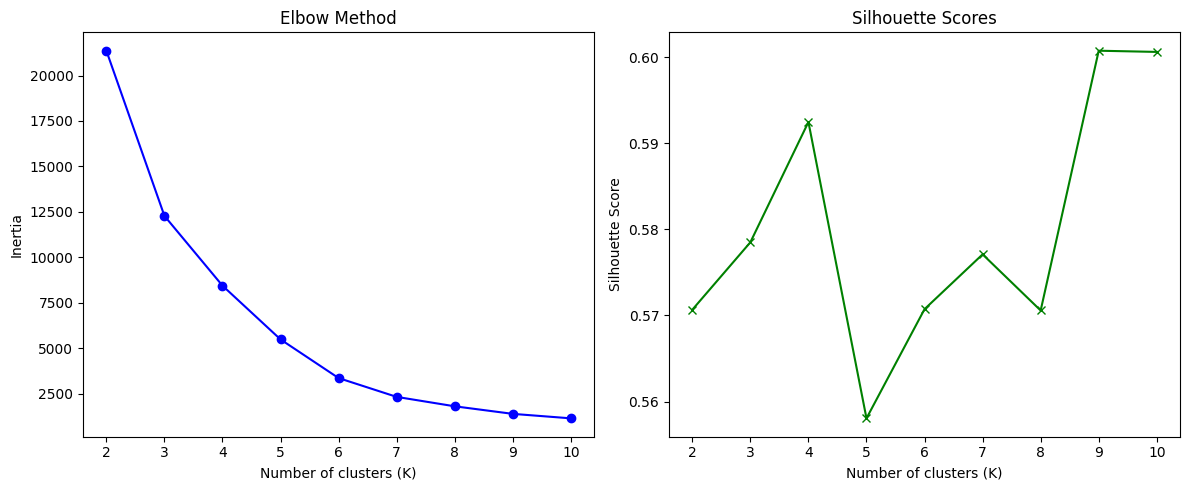

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, labels))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-', marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'go-', marker='x')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.tight_layout()

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)
customer_insights['kmeans_cluster'] = kmeans_labels

In [45]:
customer_insights.drop(columns=['Segment'],inplace=True)
customer_insights['kmeans_cluster'].value_counts()

,count
kmeans_cluster,
0,2330
3,2276
2,1062
1,11


In [46]:
customer_insights.groupby('kmeans_cluster')[['total_quantity', 'total_revenue', 'total_orders']].mean().round(2)

,total_quantity,total_revenue,total_orders
kmeans_cluster,,,
0,80.78,584.54,996.87
1,4699.73,30188.36,55209.66
2,361.99,2764.55,4889.64
3,17.17,121.43,222.19


In [47]:
customer_insights.head()

,Customer ID,total_quantity,total_revenue,total_products,total_orders,R_Score,F_Score,M_Score,RFM_Score,kmeans_cluster
0,12346,33,70,33,372.86,2,3,1,231,3
1,12347,205,2399,205,3888.01,5,5,5,555,2
2,12348,26,513,26,312.36,2,2,4,224,0
3,12349,138,1421,138,2635.04,5,4,5,545,2
4,12350,16,196,16,294.40,2,2,2,222,3


/tmp/ipython-input-48-3128907142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_insights,x='kmeans_cluster',palette='mako',order=customer_insights['kmeans_cluster'].value_counts().index,edgecolor=sns.color_palette('dark', 3),linewidth=1.5)


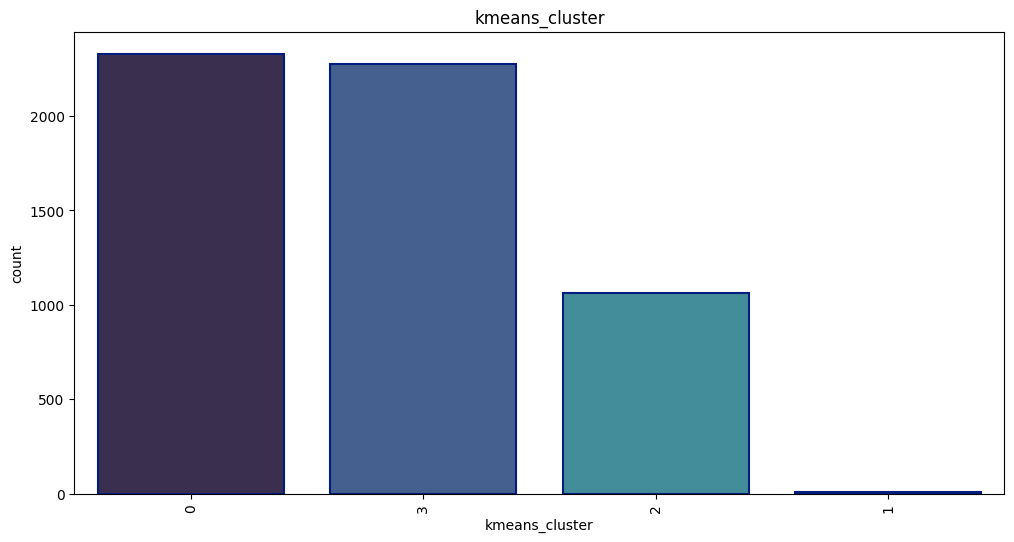

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(data=customer_insights,x='kmeans_cluster',palette='mako',order=customer_insights['kmeans_cluster'].value_counts().index,edgecolor=sns.color_palette('dark', 3),linewidth=1.5)
plt.xticks(rotation=90)
plt.title('kmeans_cluster')
plt.show()